In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot


#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)



import datetime as dt
from matplotlib import style
import pandas_datareader as web

from sklearn.preprocessing import MinMaxScaler
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, LSTM

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score


from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score


import math

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

import sklearn.metrics as metrics

WE HAVE IMPORTED ALL THE REQUIRED LIBRARIES. NOW LET US IMPORT THE DATASET

In [2]:
data = pd.read_csv(r'/Users/rupeshrajendrazagade/Downloads/spy.csv')

LET US NOW EXPLORE THE DATASET.

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,25.968958,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.153660,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.209057,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.486113,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.596937,531500


First we imported all the libraries. Let us now import the data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7029 entries, 0 to 7028
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7029 non-null   object 
 1   Open       7029 non-null   float64
 2   High       7029 non-null   float64
 3   Low        7029 non-null   float64
 4   Close      7029 non-null   float64
 5   Adj Close  7029 non-null   float64
 6   Volume     7029 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 384.5+ KB


In [5]:
print(f'Dataset contains s&p value from {data.Date.min()} to {data.Date.max()}')

Dataset contains s&p value from 1993-01-29 to 2020-12-24


In [6]:
#data['Date'] = pd.to_datetime(data['Date'])

In [7]:
#print(f'total number of days is {(data.Date.max()-data.Date.min())}')

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7.029000e+03
mean,143.521719,144.375249,142.572113,143.519237,118.285617,8.460099e+07
std,71.066727,71.377263,70.721127,71.069322,76.210369,9.671599e+07
min,43.343750,43.531250,42.812500,43.406250,25.654961,5.200000e+03
25%,99.660004,100.620003,98.629997,99.730003,70.933372,7.770700e+06
50%,127.169998,127.937500,126.199997,127.080002,93.518570,5.827570e+07
75%,180.979996,181.669998,180.570007,181.119995,157.179550,1.211237e+08
max,371.940002,378.459991,371.049988,372.239990,370.660004,8.710263e+08


<AxesSubplot:>

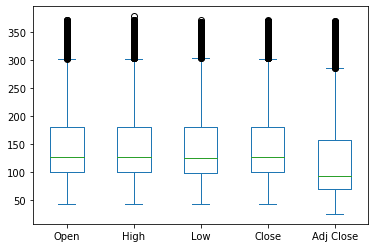

In [9]:
data[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [10]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

data1 = [{'x':data['Date'], 'y':data['Close']}]
plot = go.Figure(data=data1, layout=layout)

In [11]:
iplot(plot)

WE HAVE DONE THE PRELIMINARY EXPLORATION. NOW WE SHALL DEVELOPE A FUNCTION TO UTILISE LINEAR REGRESSION TO PREDICT THE STOCK PRICE AND DIRECTLY GIVE OUT THE SCORES OF ITS WORK.

In [12]:
def just_give_scores(df):
    df['Date'] = pd.to_datetime(df['Date'])
    X = np.array(df.index).reshape(-1,1)
    Y = df['Close']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
    scaler = StandardScaler().fit(X_train)
    from sklearn.linear_model import LinearRegression
    lm = LinearRegression()
    lm.fit(X_train, Y_train)
    scores = f'''
    {'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
    {'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
    {'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
    '''
    print(scores)

In [13]:
just_give_scores(data)


    Metric           Train                Test        
    r2_score  0.7562744165955197	0.7524451132677064
    MSE       1251.5774043483575	1198.4876771743197
    


WE SHALL NOW ATTEMPT TO DEVELOPE A FUNCTION WHICH WILL GIVE US A GRAPH ALONG WITH THE SCORES.

In [14]:
def give_scores_and_plot_graph_using_linear_reg(df):
    df['Date'] = pd.to_datetime(df['Date'])
    X = np.array(df.index).reshape(-1,1)
    Y = df['Close']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
    scaler = StandardScaler().fit(X_train)
    from sklearn.linear_model import LinearRegression
    lm = LinearRegression()
    lm.fit(X_train, Y_train)
    scores = f'''
    {'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
    {'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
    {'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
    '''
    print(scores)
    trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
    )
    trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
    )
    temp_data = [trace0,trace1]
    layout.xaxis.title.text = 'Day'
    plot2 = go.Figure(data=temp_data, layout=layout)
    iplot(plot2)

In [15]:
give_scores_and_plot_graph_using_linear_reg(data)


    Metric           Train                Test        
    r2_score  0.7562744165955197	0.7524451132677064
    MSE       1251.5774043483575	1198.4876771743197
    


LET US NOW TRY TO USE OTHER MODELS (FOR NOW, LSTM)

In [18]:
def give_scores_and_plot_graph_using_LSTM(data):
    data["Close"]=pd.to_numeric(data.Close,errors='coerce')
    data = data.dropna()
    trainData = data.iloc[:,4:5].values
    sc = MinMaxScaler(feature_range=(0,1))
    trainData = sc.fit_transform(trainData)
    trainData.shape
    X_train = []
    y_train = []
    for i in range (60,len(data)): #60 : timestep // 1149 : length of the data
        X_train.append(trainData[i-60:i,0]) 

        y_train.append(trainData[i,0])
    X_train,y_train = np.array(X_train),np.array(y_train)
    X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
    model = Sequential()

    model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units=100, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units=100, return_sequences = True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(units=100, return_sequences = False))
    model.add(Dropout(0.2))
    
    model.add(Dense(units =1))
    model.compile(optimizer='adam',loss="mean_squared_error")
    
    hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)
    
    
    plt.plot(hist.history['loss'])
    plt.title('Training model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
    
    #testData = pd.read_csv('/Users/rupeshrajendrazagade/Downloads/spy.csv')
    testData = data
    testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
    testData = testData.dropna()
    testData = testData.iloc[:,4:5]
    y_test = testData.iloc[60:,0:].values 
    #input array for the model
    inputClosing = testData.iloc[:,0:].values 
    inputClosing_scaled = sc.transform(inputClosing)
    inputClosing_scaled.shape
    X_test = []
    length = len(testData)
    timestep = 60
    for i in range(timestep,length):  
        X_test.append(inputClosing_scaled[i-timestep:i,0])
    
    X_test = np.array(X_test)
    X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
    
    y_pred = model.predict(X_test)
    
    predicted_price = sc.inverse_transform(y_pred)
    
    
    plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
    plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
    plt.title('Google stock price prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
    
    import math
    from sklearn.metrics import mean_squared_error
    a = math.sqrt(mean_squared_error(y_test,y_pred))
    print(a)
    
    mape = np.mean(np.abs((predicted_price - y_test)/y_test))*100
    print(mape)

Epoch 1/20
218/218 - 52s - loss: 0.0039 - 52s/epoch - 237ms/step
Epoch 2/20
218/218 - 63s - loss: 0.0011 - 63s/epoch - 291ms/step
Epoch 3/20
218/218 - 62s - loss: 9.6612e-04 - 62s/epoch - 286ms/step
Epoch 4/20
218/218 - 70s - loss: 8.3862e-04 - 70s/epoch - 319ms/step
Epoch 5/20
218/218 - 64s - loss: 8.0854e-04 - 64s/epoch - 293ms/step
Epoch 6/20
218/218 - 44s - loss: 7.7969e-04 - 44s/epoch - 201ms/step
Epoch 7/20
218/218 - 45s - loss: 7.2626e-04 - 45s/epoch - 205ms/step
Epoch 8/20
218/218 - 43s - loss: 6.5688e-04 - 43s/epoch - 197ms/step
Epoch 9/20
218/218 - 43s - loss: 6.3231e-04 - 43s/epoch - 196ms/step
Epoch 10/20
218/218 - 44s - loss: 6.0288e-04 - 44s/epoch - 200ms/step
Epoch 11/20
218/218 - 45s - loss: 5.4696e-04 - 45s/epoch - 207ms/step
Epoch 12/20
218/218 - 42s - loss: 5.6161e-04 - 42s/epoch - 194ms/step
Epoch 13/20
218/218 - 43s - loss: 5.0718e-04 - 43s/epoch - 200ms/step
Epoch 14/20
218/218 - 41s - loss: 5.2414e-04 - 41s/epoch - 188ms/step
Epoch 15/20
218/218 - 40s - loss: 4.9

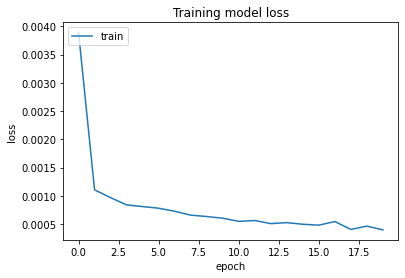

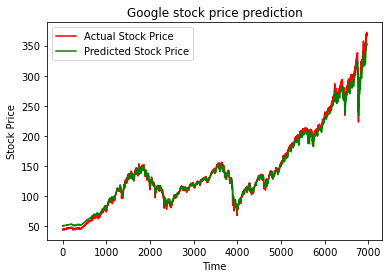

160.42273392991416
3.200468330717037


In [19]:
give_scores_and_plot_graph_using_LSTM(data)

LET US TRY TO SEE PREDICTED AND ACTUAL VALUES

In [20]:
# data["Close"]=pd.to_numeric(data.Close,errors='coerce')
# data = data.dropna()
# trainData = data.iloc[:,4:5].values
# sc = MinMaxScaler(feature_range=(0,1))
# trainData = sc.fit_transform(trainData)
# trainData.shape
# X_train = []
# y_train = []
# for i in range (60,len(data)): #60 : timestep // 1149 : length of the data
#     X_train.append(trainData[i-60:i,0]) 

#     y_train.append(trainData[i,0])
# X_train,y_train = np.array(X_train),np.array(y_train)
# X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
# model = Sequential()

# model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
# model.add(Dropout(0.2))

# model.add(LSTM(units=100, return_sequences = True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=100, return_sequences = True))
# model.add(Dropout(0.2))
    
# model.add(LSTM(units=100, return_sequences = False))
# model.add(Dropout(0.2))
    
# model.add(Dense(units =1))
# model.compile(optimizer='adam',loss="mean_squared_error")
    
# hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)
    
    
# plt.plot(hist.history['loss'])
# plt.title('Training model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train'], loc='upper left')
# plt.show()
    
# testData = pd.read_csv('/Users/rupeshrajendrazagade/Downloads/spy.csv')
# testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
# testData = testData.dropna()
# testData = testData.iloc[:,4:5]
# y_test = testData.iloc[60:,0:].values 
#     #input array for the model
# inputClosing = testData.iloc[:,0:].values 
# inputClosing_scaled = sc.transform(inputClosing)
# inputClosing_scaled.shape
# X_test = []
# length = len(testData)
# timestep = 60
# for i in range(timestep,length):  
#     X_test.append(inputClosing_scaled[i-timestep:i,0])
    
# X_test = np.array(X_test)
# X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
    
# y_pred = model.predict(X_test)
    
# predicted_price = sc.inverse_transform(y_pred)
    
    
# plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
# plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
# plt.title('Google stock price prediction')
# plt.xlabel('Time')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.show()
    
# import math
# from sklearn.metrics import mean_squared_error
# a = math.sqrt(mean_squared_error(y_test,y_pred))
# print(a)


# scores = f'''
#     {'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
#     {'r2_score'.ljust(10)}{r2_score(y_train, model.predict(X_train))}\t{r2_score(y_test, model.predict(X_test))}
#     {'MSE'.ljust(10)}{mse(y_train, model.predict(X_train))}\t{mse(y_test, model.predict(X_test))}
#     '''
# print(scores)

In [21]:
# scores = f'''
#     {'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
#     {'r2_score'.ljust(10)}{r2_score(y_train, model.predict(X_train))}\t{r2_score(y_test, model.predict(X_test))}
#     {'MSE'.ljust(10)}{mse(y_train, model.predict(X_train))}\t{mse(y_test, model.predict(X_test))}
#     '''
# print(scores)

In [22]:
#X_train.shape

In [23]:
#y_pred_1 = predicted_price

In [24]:
#print(y_pred_1)

In [25]:
#print(y_test)

LET US NOW TRY TO TEST THIS MODEL ON OTHER DATASETS

In [26]:
data2 = pd.read_csv(r'/Users/rupeshrajendrazagade/Downloads/NIFTY_2010_2021.csv')

In [27]:
data2

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,04-Jan-2010,5200.90,5238.45,5167.10,5232.20,148652424,6531.61
1,05-Jan-2010,5277.15,5288.35,5242.40,5277.90,240844424,7969.62
2,06-Jan-2010,5278.15,5310.85,5260.05,5281.80,216147837,7892.60
3,07-Jan-2010,5281.80,5302.55,5244.75,5263.10,181246734,6890.99
4,08-Jan-2010,5264.25,5276.75,5234.70,5244.75,201910800,7777.04
...,...,...,...,...,...,...,...
2868,26-Jul-2021,15849.30,15893.35,15797.00,15824.45,267076679,19487.18
2869,27-Jul-2021,15860.50,15881.55,15701.00,15746.45,311012065,26117.34
2870,28-Jul-2021,15761.55,15767.50,15513.45,15709.40,318601589,26090.48
2871,29-Jul-2021,15762.70,15817.35,15737.80,15778.45,401584915,29460.54


Epoch 1/20
88/88 - 21s - loss: 0.0120 - 21s/epoch - 242ms/step
Epoch 2/20
88/88 - 17s - loss: 0.0021 - 17s/epoch - 196ms/step
Epoch 3/20
88/88 - 18s - loss: 0.0020 - 18s/epoch - 210ms/step
Epoch 4/20
88/88 - 18s - loss: 0.0020 - 18s/epoch - 206ms/step
Epoch 5/20
88/88 - 18s - loss: 0.0018 - 18s/epoch - 204ms/step
Epoch 6/20
88/88 - 20s - loss: 0.0015 - 20s/epoch - 229ms/step
Epoch 7/20
88/88 - 18s - loss: 0.0015 - 18s/epoch - 206ms/step
Epoch 8/20
88/88 - 18s - loss: 0.0013 - 18s/epoch - 209ms/step
Epoch 9/20
88/88 - 18s - loss: 0.0012 - 18s/epoch - 201ms/step
Epoch 10/20
88/88 - 19s - loss: 0.0014 - 19s/epoch - 212ms/step
Epoch 11/20
88/88 - 18s - loss: 0.0011 - 18s/epoch - 209ms/step
Epoch 12/20
88/88 - 18s - loss: 0.0012 - 18s/epoch - 203ms/step
Epoch 13/20
88/88 - 18s - loss: 0.0013 - 18s/epoch - 204ms/step
Epoch 14/20
88/88 - 18s - loss: 9.9499e-04 - 18s/epoch - 200ms/step
Epoch 15/20
88/88 - 18s - loss: 9.9938e-04 - 18s/epoch - 202ms/step
Epoch 16/20
88/88 - 18s - loss: 9.3113e-0

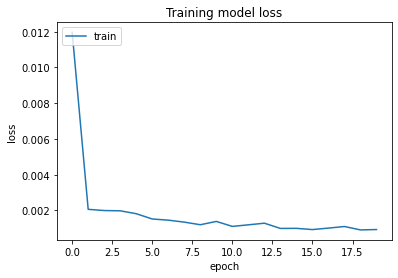

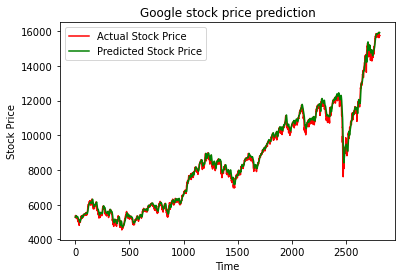

8911.977206651458
1.7287857981926242


In [28]:
give_scores_and_plot_graph_using_LSTM(data2)

MODEL IS PERFORMING NOT BAD.

LET US TRY IT ON SOME MORE DATA

In [29]:
data3 = pd.read_csv('/Users/rupeshrajendrazagade/Downloads/data and python/DATASETS/Coca-Cola_stock_history.csv')

In [30]:
data3.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


Epoch 1/20
477/477 - 139s - loss: 0.0014 - 139s/epoch - 290ms/step
Epoch 2/20
477/477 - 111s - loss: 6.0238e-04 - 111s/epoch - 233ms/step
Epoch 3/20
477/477 - 111s - loss: 5.3717e-04 - 111s/epoch - 233ms/step
Epoch 4/20
477/477 - 119s - loss: 5.4700e-04 - 119s/epoch - 249ms/step
Epoch 5/20
477/477 - 126s - loss: 4.6898e-04 - 126s/epoch - 264ms/step
Epoch 6/20
477/477 - 95s - loss: 4.5430e-04 - 95s/epoch - 200ms/step
Epoch 7/20
477/477 - 89s - loss: 4.5607e-04 - 89s/epoch - 186ms/step
Epoch 8/20
477/477 - 112s - loss: 4.4478e-04 - 112s/epoch - 235ms/step
Epoch 9/20
477/477 - 89s - loss: 4.3514e-04 - 89s/epoch - 186ms/step
Epoch 10/20
477/477 - 89s - loss: 4.1596e-04 - 89s/epoch - 186ms/step
Epoch 11/20
477/477 - 119s - loss: 4.1529e-04 - 119s/epoch - 250ms/step
Epoch 12/20
477/477 - 118s - loss: 3.5682e-04 - 118s/epoch - 247ms/step
Epoch 13/20
477/477 - 93s - loss: 3.9854e-04 - 93s/epoch - 195ms/step
Epoch 14/20
477/477 - 114s - loss: 3.8218e-04 - 114s/epoch - 238ms/step
Epoch 15/20
477

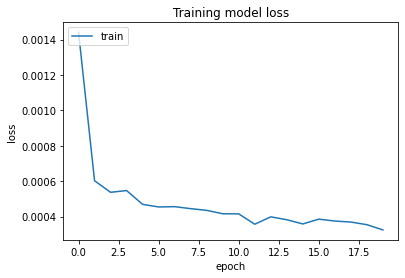

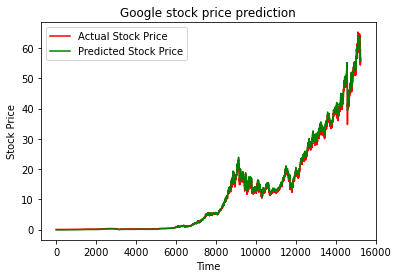

18.852754247945818
37.42913782127206


In [31]:
give_scores_and_plot_graph_using_LSTM(data3)